In [11]:
import csv
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [19]:
import pandas as pd

# Generate simulated dataset
def generate_data(num_samples=420000):
    data = []
    for _ in range(num_samples):
        connection_duration = random.uniform(1, 60)  # in minutes
        signal_strength = random.uniform(-100, -30)  # in dBm
        data_transfer_rate = random.uniform(1, 100)  # in Mbps
        time_of_day = random.uniform(0, 24)  # in hours

        # Simulate intrusions
        is_intrusion = random.random() < 0.5  # 10% chance of being an intrusion

        data.append([connection_duration, signal_strength, data_transfer_rate, time_of_day, is_intrusion])

    with open('bluetooth_data3.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['connection_duration', 'signal_strength', 'data_transfer_rate', 'time_of_day', 'is_intrusion'])
        writer.writerows(data)
        


In [3]:
import pandas as pd
import numpy as np

def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    print(f"NaN values in dataset:\n{data.isna().sum()}")
    
    # Remove rows with NaN values
    data_cleaned = data.dropna()
    
    # Split features and target
    X = data_cleaned.iloc[:, :-1].values
    y = data_cleaned.iloc[:, -1].values
    
    return X, y

In [4]:
def train_model():
    X, y = preprocess_data('bluetooth_data.csv')
    
    if len(X) == 0 or len(y) == 0:
        raise ValueError("All data rows contained NaN values and were removed. Please review your data collection process.")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    return model, scaler
train_model()

In [5]:
# Classify a connection
def classify_connection(model, scaler, sample):
    sample_scaled = scaler.transform([[
        sample['connection_duration'],
        sample['signal_strength'],
        sample['data_transfer_rate'],
        sample['time_of_day']
    ]])
    return model.predict(sample_scaled)[0]

NaN values in dataset:
connection_duration    0
signal_strength        0
data_transfer_rate     0
time_of_day            0
label                  0
dtype: int64
              precision    recall  f1-score   support

           0       0.91      0.54      0.68      2711
           1       0.10      0.50      0.17       289

    accuracy                           0.53      3000
   macro avg       0.51      0.52      0.42      3000
weighted avg       0.83      0.53      0.63      3000


Options:
1. Display Bluetooth connections
2. Simulate real-time detection
3. Exit

Data: {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10} => Status: Normal Connection

Data: {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 23} => Status: Intrusion Detected!

Blocking intrusion: {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 23}

Data: {'connection_duration': 7, 'signal_str

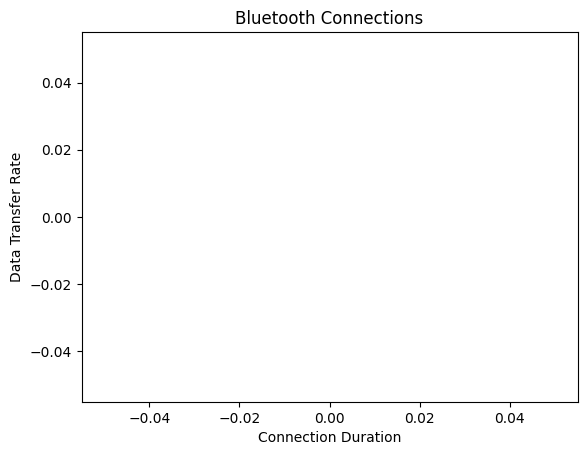


Options:
1. Display Bluetooth connections
2. Simulate real-time detection
3. Exit



In [6]:
# Block an intrusion (simulated)
def block_intrusion(sample):
    print(f"Blocking intrusion: {sample}\n")

# Command-line interface
def main():
    # generate_data()
    model, scaler = train_model()

    while True:
        print("\nOptions:")
        print("1. Display Bluetooth connections")
        print("2. Simulate real-time detection")
        print("3. Exit\n")
        choice = input("Enter your choice: ")

        if choice == '1':
            data = np.genfromtxt('bluetooth_data1.csv', delimiter=',', skip_header=1)
            plt.scatter(data[:, 0], data[:, 2], c=data[:, -1], cmap='bwr')
            plt.xlabel('Connection Duration')
            plt.ylabel('Data Transfer Rate')
            plt.title('Bluetooth Connections')
            plt.show()
        elif choice == '2':
            test_samples = [
                {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10},
                {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 23},
                {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15},
                {'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 3},
                {'connection_duration': 1, 'signal_strength': -90, 'data_transfer_rate': 50, 'time_of_day': 3}
            ]

            for sample in test_samples:
                prediction = classify_connection(model, scaler, sample)
                status = "Intrusion Detected!\n" if prediction == 1 else "Normal Connection\n"
                print(f"Data: {sample} => Status: {status}")
                if prediction == 1:
                    block_intrusion(sample)
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__": 
    main()



  ## To block a Bluetooth connection

In [17]:
import logging
import subprocess
import sys

logging.basicConfig(level=logging.INFO)

def block_intrusion(device_address):
    try:
        logging.info(f"Attempting to block device with address: {device_address}")
        
        if sys.platform.startswith('linux'):
            # Linux-specific blocking command (replace with actual command)
            command = ['sudo', 'rfcomm', 'block', device_address]
        elif sys.platform == 'darwin':
            # macOS-specific blocking command (replace with actual command)
            command = ['sudo', 'blueutil', '--block', device_address]
        elif sys.platform == 'win32':
            # Windows-specific blocking command (replace with actual command)
            command = ['powershell', '-Command', f"Block-BTDevice -DeviceAddress '{device_address}'"]
        else:
            raise NotImplementedError(f"Blocking not implemented for {sys.platform}")

        result = subprocess.run(command, check=True, capture_output=True, text=True)
        logging.info(f"Device {device_address} blocked successfully. Output: {result.stdout}")
    except subprocess.CalledProcessError as e:
        logging.error(f"Failed to block device {device_address}: {e.stderr}")
    except Exception as e:
        logging.error(f"Unexpected error blocking device {device_address}: {e}")

# Example usage
sample_intrusion = {'device_address': '00:11:22:33:44:55', 'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 3}
block_intrusion(sample_intrusion['device_address'])

## NOTE: This
# Actual Bluetooth blocking would require system-level permissions and would vary 
# depending on the operating 
# system and Bluetooth stack being used.

# In a real implementation, you'd want to use more secure methods like subprocess.run() 
# with proper input sanitization

INFO:root:Attempting to block device with address: 00:11:22:33:44:55
ERROR:root:Failed to block device 00:11:22:33:44:55: Block-BTDevice : The term 'Block-BTDevice' is not recognized as the name of a cmdlet, function, script file, or 
operable program. Check the spelling of the name, or if a path was included, verify that the path is correct and try 
again.
At line:1 char:1
+ Block-BTDevice -DeviceAddress '00:11:22:33:44:55'
+ ~~~~~~~~~~~~~~
    + CategoryInfo          : ObjectNotFound: (Block-BTDevice:String) [], CommandNotFoundException
    + FullyQualifiedErrorId : CommandNotFoundException
 

